# Fine Tune Transformers Models

In [2]:
from adaptnlp import LMFineTuner

### 1. Initialize train and test data, same format as you would load in a classifier

In [3]:
train_data_file = "Path/to/train.csv" 
eval_data_file = "Path/to/test.csv"

### 2. Initialize Fine Tuner and Freeze up to last layer

In [4]:
ft_configs = {
              "train_data_file": train_data_file,
              "eval_data_file": eval_data_file,
              "model_type": "bert",
              "model_name_or_path": "bert-base-cased",
              "mlm": True,
              "mlm_probability": 0.15,
              "config_name": None,
              "tokenizer_name": None,
              "cache_dir": None,
              "block_size": -1,
              "no_cuda": False,
              "overwrite_cache": False,
              "seed": 42,
              "fp16": False,
              "fp16_opt_level": "01",
              "local_rank": -1,
             }
finetuner = LMFineTuner(**ft_configs)
finetuner.freeze()

02/03/2020 17:27:02 - WARNING - novettanlp.transformers.finetuning -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: False
02/03/2020 17:27:02 - INFO - transformers.configuration_utils -   loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-config.json from cache at /home/ubuntu/.cache/torch/transformers/b945b69218e98b3e2c95acf911789741307dec43c698d35fad11c1ae28bda352.3d5adf10d3445c36ce131f4c6416aa62e9b58e1af56b97664773f4858a46286e
02/03/2020 17:27:02 - INFO - transformers.configuration_utils -   Model config {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_n

### 3. Find Learning Rate for Fine Tuner with automated learning rate finder

02/03/2020 17:27:30 - INFO - novettanlp.transformers.finetuning -   Creating features from dataset file at ../../development/data/trec_6


Opening file
Reading file ../../development/data/trec_6/train.csv


100%|██████████| 122/122 [00:00<00:00, 89694.14it/s]
02/03/2020 17:27:31 - INFO - novettanlp.transformers.finetuning -   Saving features into cached file ../../development/data/trec_6/bert_cached_lm_510_train.csv


iterating through tokenized text
[1.4454397707459274e-07, 1.4454397707459274e-07]
[1.7378008287493754e-07, 1.7378008287493754e-07]
[2.0892961308540395e-07, 2.0892961308540395e-07]
[2.51188643150958e-07, 2.51188643150958e-07]
[3.019951720402016e-07, 3.019951720402016e-07]
[3.6307805477010137e-07, 3.6307805477010137e-07]
[4.36515832240166e-07, 4.36515832240166e-07]
[5.248074602497725e-07, 5.248074602497725e-07]
[6.309573444801933e-07, 6.309573444801933e-07]
[7.585775750291837e-07, 7.585775750291837e-07]
[9.120108393559096e-07, 9.120108393559096e-07]
[1.096478196143185e-06, 1.096478196143185e-06]
[1.3182567385564074e-06, 1.3182567385564074e-06]
[1.5848931924611132e-06, 1.5848931924611132e-06]
[1.9054607179632473e-06, 1.9054607179632473e-06]
[2.2908676527677735e-06, 2.2908676527677735e-06]
[2.754228703338166e-06, 2.754228703338166e-06]
[3.311311214825911e-06, 3.311311214825911e-06]
[3.981071705534973e-06, 3.981071705534973e-06]
[4.7863009232263826e-06, 4.7863009232263826e-06]
[5.7543993733

02/03/2020 17:27:44 - INFO - novettanlp.transformers.finetuning -   ----------------------------------------------------------------------------------------------------
02/03/2020 17:27:44 - INFO - novettanlp.transformers.finetuning -   loss diverged - stopping early!
02/03/2020 17:27:44 - INFO - novettanlp.transformers.finetuning -   ----------------------------------------------------------------------------------------------------
02/03/2020 17:27:44 - INFO - novettanlp.transformers.finetuning -   learning rate finder finished - plot resources/finetuned/bert-base-cased-trec_6/learning_rate.tsv 
 Reinitalizing model's parameters and optimizer
02/03/2020 17:27:44 - INFO - novettanlp.transformers.finetuning -   ----------------------------------------------------------------------------------------------------
02/03/2020 17:27:44 - WARNING - novettanlp.transformers.finetuning -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: False
02/03/2020 1

[4.7863009232263805, 4.7863009232263805]


02/03/2020 17:27:48 - INFO - transformers.modeling_utils -   Weights from pretrained model not used in BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']


Learning_rate plots are saved in resources/finetuned/bert-base-cased-trec_6/learning_rate.png


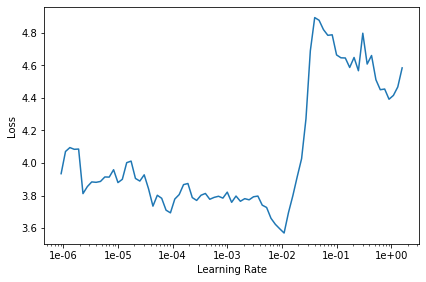

Recommended Learning Rate 0.004365158322401656


In [5]:
learning_rate_finder_configs = {
    "base_path": "./resources/finetuned/bert-base-cased-trec_6",
    "file_name": "learning_rate.tsv",
    "start_learning_rate": 1e-7,
    "end_learning_rate": 10,
    "iterations": 100,
    "mini_batch_size": 8,
    "stop_early": True,
    "smoothing_factor": 0.7,
    "adam_epsilon": 1e-8,
    "weight_decay": 0.0,
}
learning_rate = finetuner.find_learning_rate(**learning_rate_finder_configs)
finetuner.freeze()

### 4. Train One Cycle

In [6]:
finetuner.freeze()
train_configs = {
    "output_dir": "./resources/finetuned/bert-base-cased-trec_6",
    "should_continue": False,
    "overwrite_output_dir": True,
    "evaluate_during_training": True,
    "per_gpu_train_batch_size": 4,
    "gradient_accumulation_steps": 1,
    "learning_rate": learning_rate,
    "weight_decay": 0.0,
    "adam_epsilon": 1e-8,
    "max_grad_norm": 1.0,
    "num_train_epochs": 10.0,
    "max_steps": -1,
    "warmup_steps": 0,
    "logging_steps": 50,
    "save_steps": 50,
    "save_total_limit": None,
    "use_tensorboard": False,
}
finetuner.train_one_cycle(**train_configs)

02/03/2020 17:28:41 - INFO - novettanlp.transformers.finetuning -   Training/evaluation parameters {'use_tensorboard': False, 'save_total_limit': None, 'save_steps': 50, 'logging_steps': 50, 'warmup_steps': 0, 'max_steps': -1, 'num_train_epochs': 10.0, 'max_grad_norm': 1.0, 'adam_epsilon': 1e-08, 'weight_decay': 0.0, 'learning_rate': 0.004365158322401656, 'gradient_accumulation_steps': 1, 'per_gpu_train_batch_size': 4, 'evaluate_during_training': True, 'overwrite_output_dir': True, 'should_continue': False, 'output_dir': './resources/finetuned/bert-base-cased-trec_6', 'init_locals': {...}, 'self': <novettanlp.transformers.finetuning.LMFineTuner object at 0x7fca31b4a390>}
02/03/2020 17:28:41 - INFO - novettanlp.transformers.finetuning -   Loading features from cached file ../../development/data/trec_6/bert_cached_lm_510_train.csv
02/03/2020 17:28:41 - INFO - novettanlp.transformers.finetuning -   ***** Running training *****
02/03/2020 17:28:41 - INFO - novettanlp.transformers.finetunin

Opening file
Reading file ../../development/data/trec_6/test.csv
iterating through tokenized text


Evaluating: 100%|██████████| 3/3 [00:00<00:00, 21.17it/s]
02/03/2020 17:28:45 - INFO - novettanlp.transformers.finetuning -   ***** Eval results  *****
02/03/2020 17:28:45 - INFO - novettanlp.transformers.finetuning -     perplexity = tensor(16.1410)
02/03/2020 17:28:45 - INFO - transformers.configuration_utils -   Configuration saved in ./resources/finetuned/bert-base-cased-trec_6/checkpoint-50/config.json
02/03/2020 17:28:48 - INFO - transformers.modeling_utils -   Model weights saved in ./resources/finetuned/bert-base-cased-trec_6/checkpoint-50/pytorch_model.bin
02/03/2020 17:28:49 - INFO - novettanlp.transformers.finetuning -   Saving model checkpoint to ./resources/finetuned/bert-base-cased-trec_6/checkpoint-50
02/03/2020 17:28:51 - INFO - novettanlp.transformers.finetuning -   Saving optimizer and scheduler states to ./resources/finetuned/bert-base-cased-trec_6/checkpoint-50
Iteration:  19%|█▉        | 6/31 [00:00<00:01, 13.25it/s]02/03/2020 17:28:55 - INFO - novettanlp.transform

In [ ]:
finetuner.train(**train_configs)